# Projet 7: Détectez les Bad Buzz grâce au Deep Learning 

In [1]:
#pip install mlflow

In [2]:
import mlflow.sklearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#style des graphiques
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('training_1600000_processed_noemoticon.csv',
                 encoding = 'latin',header=None)

## 1. Exploration du df

In [5]:
data.sample(10)

,0,1,2,3,4,5
1237917,4,1993142171,Mon Jun 01 09:54:00 PDT 2009,NO_QUERY,rachael_andre,got out early....yay 10 days!!!
696158,0,2253448551,Sat Jun 20 08:11:13 PDT 2009,NO_QUERY,prettyxugly,my toof hurts
1228099,4,1991118927,Mon Jun 01 06:26:24 PDT 2009,NO_QUERY,Chai_Bo,"Yeye, finally entire CD's transfered to the 'c..."
1013407,4,1881315989,Fri May 22 04:17:56 PDT 2009,NO_QUERY,Silverknuten,@simplytwisted Good luck! New house is a new s...
285143,0,1993519280,Mon Jun 01 10:30:28 PDT 2009,NO_QUERY,Vic_NornIron,Still waiting on parentals arriving... last da...
616277,0,2226602191,Thu Jun 18 12:09:19 PDT 2009,NO_QUERY,Alli0567,"Summer, where are you?!"
203629,0,1972415897,Sat May 30 09:10:58 PDT 2009,NO_QUERY,alyssaluvsmcfly,@tommcfly i wish that i could watch shows that...
130389,0,1835302125,Mon May 18 05:40:09 PDT 2009,NO_QUERY,theinfamousj,Saw Angels &amp; Demons last night. That is a ...
1473249,4,2065525057,Sun Jun 07 08:46:27 PDT 2009,NO_QUERY,JeffersonJDato,Is gonna go for that fat jesus look starting t...
633416,0,2232997148,Thu Jun 18 20:41:20 PDT 2009,NO_QUERY,raulalexander,Video: Paris Hilton is a dumb bitch. But I wis...


In [6]:
print(data.shape)

(1600000, 6)


In [7]:
pd.set_option('display.max_rows', None)     #toutes les ligne
#pourcentage de valeurs manquantes par ordre croissant
(data.isnull().sum()/data.shape[0]*100).sort_values()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
dtype: float64

In [8]:
data.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
class_counts = data['sentiment'].value_counts()
class_counts

sentiment
0    800000
4    800000
Name: count, dtype: int64

Cette colonnne correspond aux 2 classes : égalité parfaite

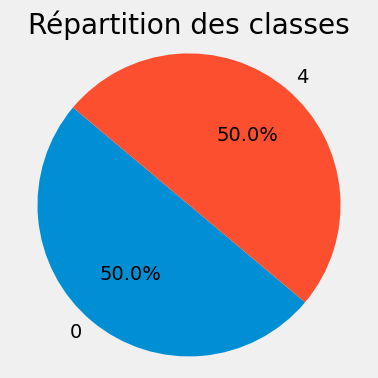

In [10]:
plt.figure(figsize=(4, 4)) 
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des classes')
plt.axis('equal') 
plt.tight_layout()
plt.show()


Définition des labels :
* 0 : sentiment négatif
* 4 : sentiment positif

In [11]:
data.columns

Index(['sentiment', 'id', 'date', 'query', 'user_id', 'text'], dtype='object')

In [12]:
colonnes_nulles =['id', 'date', 'query', 'user_id']
data.drop(colonnes_nulles, axis=1, inplace=True)

In [13]:
df = data
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
#save
df.to_csv("df_0.csv", index=False)

## 2. Exploration du corpus

In [15]:
df = df.sample(frac=0.0085)
df.shape

(13600, 2)

In [16]:
#NLP
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer

#visio
from wordcloud import WordCloud

In [17]:
#telechargement
"""
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
"""

"\nnltk.download('punkt')\nnltk.download('stopwords')\nnltk.download('words')\nnltk.download('wordnet')\nnltk.download('omw-1.4')\n"

#### Premier preprocessing

In [18]:
corpus = ' '.join(df.text)
corpus[:1000]

"@PrincessPinkee Awwww man. I'm in route to the valley.  @VaneDEW  LOL!!  sorry   is he on here? Maybe he's posted stuff from the cruise? headacheeeeee! but i finished my submarine board  @iszzzcaringal Yeah! I loved it when I saw it in the bookstore! HAHA  Chapt 14 now  #PakCricket sadness! That looks like too high a total for pakiboyzz!  @KevinSpacey Good Saturday morning! What're your plans for London this weekend?  Twitter never complies with what I want to do  argh the wifi on my phone won't work anymore :@ and my cough is so bad tonight i can't sleep cause of it  @HipHopObama don't be like dat  LMAO... thought u were supposed to be up here homie  @LaMamaNaturale I did the same. We had ordered out pizza for the first time in 6 months!  Watching @shanedawson live!  Main roommm: whoakayy94! SWINE FLU IS SO UNCOOL! -_-&quot; if this damn virus speads all over the country, classes will be suspended...  @frankiedelgado hello there Mr. Delgado!  @yapha How much do you love me?  Not a lo

In [19]:
len(corpus)

1016879

In [20]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{"you'll", 'at', 'off', 'than', 'each', "that'll", 'do', 'on', 'm', 'out', 'during', 've', 'such', 'them', "don't", 'yourself', 'most', 'ourselves', 'below', 'am', 'shouldn', 'more', 'to', "you've", 'was', 't', 'can', 'this', 'himself', 'ma', 'have', 'our', 'in', 'wasn', "doesn't", 'his', 'is', 'won', "wouldn't", 'a', 'doesn', 'now', 'over', 'he', 'being', 'the', 'has', 'don', 'down', "hadn't", 'how', 'him', 'then', 'yours', 'from', 'ours', 'does', 'other', 'couldn', 'that', 'while', 'very', 'by', 'themselves', 'they', 'yourselves', 'all', "you'd", 'once', "should've", 'should', 'i', 'between', 'where', 'any', "wasn't", 'be', 'same', 'mustn', "needn't", 'which', 'its', 's', 'before', 'my', "it's", 'hers', 'mightn', 'an', 'these', 'itself', 'further', 'if', 'up', 'you', 'here', 'few', 'with', 'didn', 'when', 'some', 'we', 'll', 'myself', 'hadn', 'ain', "couldn't", 'about', 'too', 'through', 'she', 'haven', "you're", 'until', 'd', 'only', 'their', 'wouldn', 'there', "mustn't", 'shan', 'a

In [21]:
eng_words = [i.lower() for i in words.words()]
eng_words[2820:2830]

['adrenalectomize',
 'adrenalectomy',
 'adrenalin',
 'adrenaline',
 'adrenalize',
 'adrenalone',
 'adrenergic',
 'adrenin',
 'adrenine',
 'adrenochrome']

In [22]:
#Premier prétraitement
def process_text_1(doc, rejoin=True):
    """function of preprocessing"""
    
    #lower
    doc = doc.lower().strip() #sup d'espaces début et fin
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc) #autre tokenize
    
    #stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    cleaned_tokens_list = [mot for mot in cleaned_tokens_list if mot.lower() in eng_words]

    cleaned_tokens = " ".join(cleaned_tokens_list)
    
    if rejoin :
        return cleaned_tokens 
    
    return cleaned_tokens_list

In [23]:
def display_tokens_info(tokens):
    """Display infos about corpus"""
    print(f"Nb tokens {len(tokens)}, Nb tokens unique {len(set(tokens))}")
    print("")
    print(tokens[:30])

In [24]:
df.head(10)

,sentiment,text
77563,0,@PrincessPinkee Awwww man. I'm in route to the...
119852,0,@VaneDEW LOL!! sorry is he on here? Maybe ...
973806,4,headacheeeeee! but i finished my submarine board
1218952,4,@iszzzcaringal Yeah! I loved it when I saw it ...
742383,0,#PakCricket sadness! That looks like too high ...
924735,4,@KevinSpacey Good Saturday morning! What're yo...
376248,0,Twitter never complies with what I want to do
582538,0,argh the wifi on my phone won't work anymore :...
1083342,4,@HipHopObama don't be like dat LMAO... though...
1363391,4,@LaMamaNaturale I did the same. We had ordered...


In [25]:
df_subset = df.head(10)

In [26]:
#df['text'] = df['text'].apply(process_text_1)
df_subset['text'] = df_subset['text'].apply(process_text_1)

/var/folders/cb/03rpylzj4zxbdyzn_6wm7knr0000gn/T/ipykernel_1842/3929252616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['text'] = df_subset['text'].apply(process_text_1)


In [27]:
df_subset.head(10)

,sentiment,text
77563,0,man route valley
119852,0,sorry maybe posted stuff cruise
973806,4,finished submarine board
1218952,4,yeah saw bookstore chapt
742383,0,sadness like high total
924735,4,good saturday morning weekend
376248,0,twitter never want
582538,0,phone work cough bad tonight sleep cause
1083342,4,like thought u supposed
1363391,4,ordered pizza first time


In [28]:
from tqdm import tqdm
from joblib import Parallel, delayed

In [29]:
tqdm.pandas()

In [30]:
#n_jobs=-1 utilise tous les coeurs dispo
df['clean_text_1'] = Parallel(n_jobs=-1)(delayed(process_text_1)(text) for text in tqdm(df['text']))

100%|█████████████████████████████████████| 13600/13600 [05:19<00:00, 42.59it/s]


In [31]:
#df['text'] = df['text'].apply(process_text_1)

In [32]:
df.head()

,sentiment,text,clean_text_1
77563,0,@PrincessPinkee Awwww man. I'm in route to the...,man route valley
119852,0,@VaneDEW LOL!! sorry is he on here? Maybe ...,sorry maybe posted stuff cruise
973806,4,headacheeeeee! but i finished my submarine board,finished submarine board
1218952,4,@iszzzcaringal Yeah! I loved it when I saw it ...,yeah saw bookstore chapt
742383,0,#PakCricket sadness! That looks like too high ...,sadness like high total


In [33]:
# Filtrer les tweets de la classe 0 (mauvais tweets)
df_neg = df[df['sentiment'] == 0]
df_pos = df[df['sentiment'] == 4]

In [34]:
corpus_0 = ' '.join(df_neg.clean_text_1)
corpus_4 = ' '.join(df_pos.clean_text_1)

In [35]:
corpus = ' '.join(df.clean_text_1)

In [36]:
#process corpus
##corpus_00 = process_text_1(corpus_0)
#corpus_44 = process_text_1(corpus_4)
#corpus_ = process_text_1(corpus)

In [37]:
#tokenize
tokenizer = RegexpTokenizer(r"\w+")

corpus_00 = tokenizer.tokenize(corpus_0)
corpus_44 = tokenizer.tokenize(corpus_4)

In [38]:
corpus_ = tokenizer.tokenize(corpus)

In [39]:
display_tokens_info(corpus_00)

Nb tokens 36789, Nb tokens unique 5080

['man', 'route', 'valley', 'sorry', 'maybe', 'posted', 'stuff', 'cruise', 'sadness', 'like', 'high', 'total', 'twitter', 'never', 'want', 'phone', 'work', 'cough', 'bad', 'tonight', 'sleep', 'cause', 'swine', 'flu', 'quot', 'damn', 'virus', 'country', 'classes', 'suspended']


In [40]:
display_tokens_info(corpus_44)

Nb tokens 34864, Nb tokens unique 5095

['finished', 'submarine', 'board', 'yeah', 'saw', 'bookstore', 'chapt', 'good', 'saturday', 'morning', 'weekend', 'like', 'thought', 'u', 'supposed', 'ordered', 'pizza', 'first', 'time', 'watching', 'live', 'main', 'hello', 'mr', 'hey', 'angela', 'seeing', 'strange', 'also', 'follow']


In [41]:
#display_tokens_info(corpus_)

In [42]:
df.head()

,sentiment,text,clean_text_1
77563,0,@PrincessPinkee Awwww man. I'm in route to the...,man route valley
119852,0,@VaneDEW LOL!! sorry is he on here? Maybe ...,sorry maybe posted stuff cruise
973806,4,headacheeeeee! but i finished my submarine board,finished submarine board
1218952,4,@iszzzcaringal Yeah! I loved it when I saw it ...,yeah saw bookstore chapt
742383,0,#PakCricket sadness! That looks like too high ...,sadness like high total


### Observation des tendances 

In [43]:
#longueurs des textes
df_neg.clean_text_1.apply(lambda i : len(i)).head(10)

77563     16
119852    31
742383    23
376248    18
582538    40
261021    51
202727    40
578683    23
467411    11
556435     0
Name: clean_text_1, dtype: int64

<Axes: ylabel='clean_text_1'>

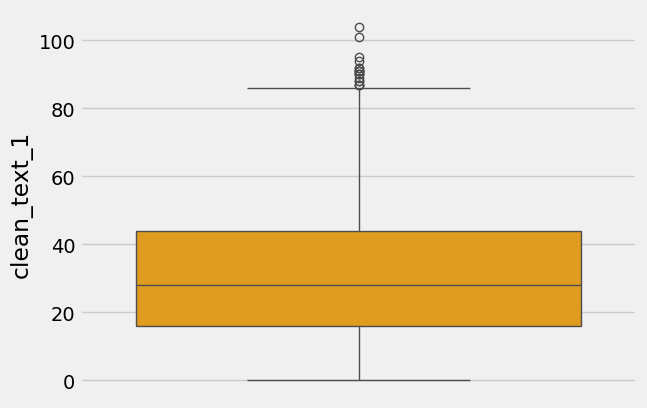

In [44]:
#vivio
tmc0 = df_neg.clean_text_1.str.len()
sns.boxplot(tmc0, color='orange')

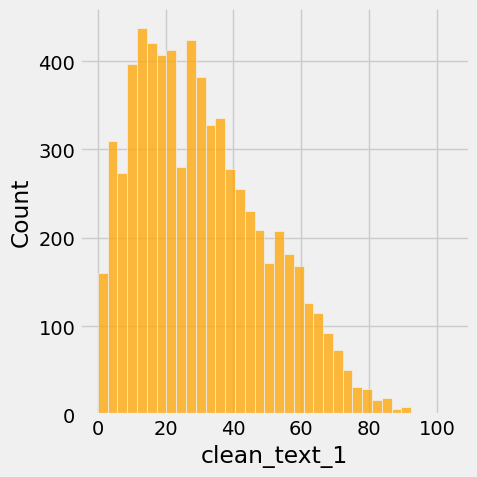

In [45]:
sns.displot(tmc0, color='orange')

In [46]:
#longueurs des textes
df_pos.clean_text_1.apply(lambda i : len(i)).head(10)

973806     24
1218952    24
924735     29
1083342    23
1363391    24
1115747    18
1507565     8
1402532    37
1486901     0
1566945    10
Name: clean_text_1, dtype: int64

<Axes: ylabel='clean_text_1'>

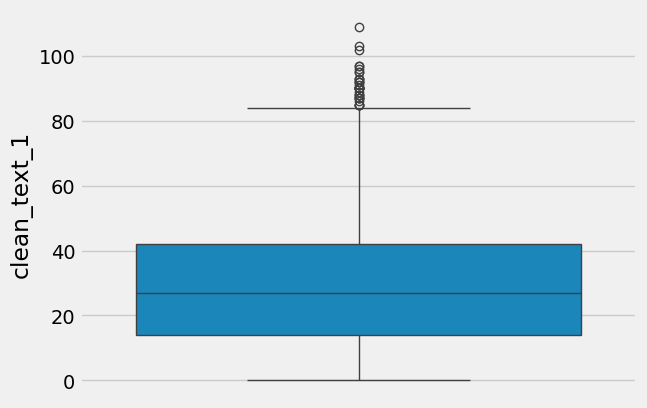

In [47]:
#vivio
tmc4 = df_pos.clean_text_1.str.len()
sns.boxplot(tmc4)

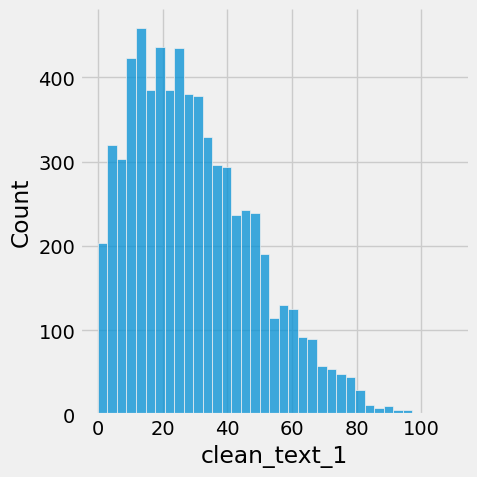

In [48]:
sns.displot(tmc4)

Les moyennes de nombre de mots sont plutot similaires  

In [49]:
#0
text0 = ' '.join(df_neg['clean_text_1'])
wordcloud0 = WordCloud(width=800, height=400, background_color='gray').generate(text0)

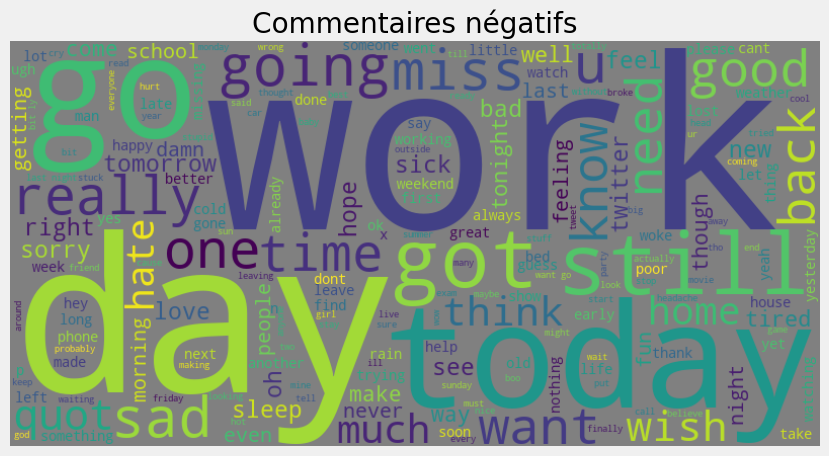

In [50]:
#map des mots clés prédominants
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis('off')
plt.title('Commentaires négatifs')
plt.show()

In [51]:
#4
text4 = ' '.join(df_pos['clean_text_1'])
wordcloud4 = WordCloud(width=800, height=400, background_color='white').generate(text4)

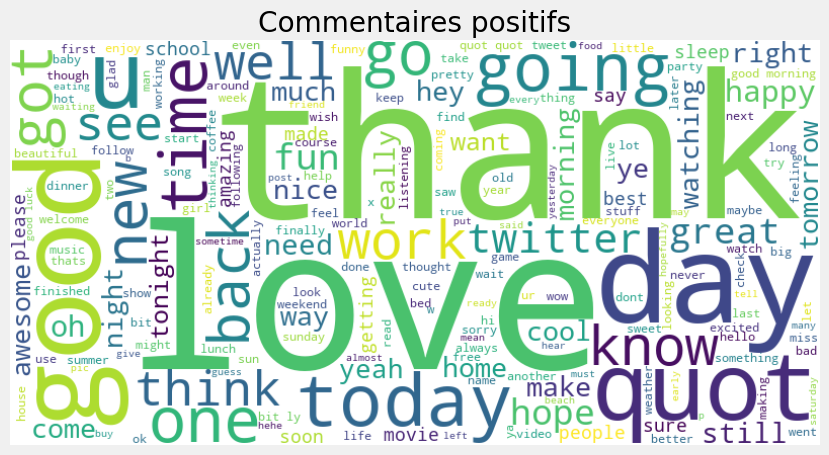

In [52]:
#map des mots clés prédominants
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.title('Commentaires positifs')
plt.show()

On peut remarquer qu'il y a très peu de similarité entre les mots

In [53]:
#doublons
n =20
doublons = [d for d in pd.Series(corpus_44).value_counts().head(n).index 
            if d in pd.Series(corpus_00).value_counts().head(n).index]
doublons

['good',
 'day',
 'quot',
 'like',
 'get',
 'going',
 'today',
 'time',
 'one',
 'go',
 'got',
 'know',
 'back']

In [54]:
tmp = pd.Series(corpus_).value_counts()
#nombre des tokens du corpus

In [55]:
len(tmp)

7148

In [56]:
#Valeurs uniques et min
#listes des tokens uniques
list_unique_words = tmp[tmp==1]
list_unique_words = list_unique_words.index.tolist()
list_unique_words[:10]

['orthodox',
 'crank',
 'gullible',
 'oboe',
 'ante',
 'nutcrackers',
 'represent',
 'juliet',
 'aloof',
 'starshine']

In [57]:
len(list_unique_words)

3187

In [58]:
#Valeurs de moins de 5 occurences dans les corpus
min_5_words = tmp[tmp<=5]
len(min_5_words)

5507

#### Stemmer sur les eng_words
Conservation des racines des mots

In [59]:
#Cette méthode nous permettra de faire converger les racines des mots. 
from nltk.stem import PorterStemmer

In [60]:
#stem_or_lem of eng_words
st = PorterStemmer()
eng_words_stem = [st.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

Nb tokens 236736, Nb tokens unique 178311

['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']


Stemmer plus efficace dans le racinage des mots

#### fonction de nettoyage

In [61]:
import string

In [62]:
def process_text_final(document, rejoin=True, rare_words_list=min_5_words, min_len_word=3, eng_words=eng_words, extra_words=doublons):
    
    # Initialisation des listes vides si les paramètres optionnels ne sont pas fournis
    if rare_words_list is None:
        rare_words_list = []
    if extra_words is None:
        extra_words = []
    if eng_words is None:
        eng_words = []

    # Tokenization
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(document)

    # Filtrage des mots rares
    tokens = [w for w in tokens if w not in rare_words_list]

    # Filtrage des mots supplémentaires
    tokens = [w for w in tokens if w not in extra_words]

    # Suppression des mots courts
    tokens = [word for word in tokens if len(word) >= min_len_word]

    cleaned_tokens = " ".join(tokens)

    if rejoin:
        return cleaned_tokens

    return tokens


In [63]:
(df.isnull().sum()/df.shape[0]*100).sort_values()

sentiment       0.0
text            0.0
clean_text_1    0.0
dtype: float64

In [64]:
df.head()

,sentiment,text,clean_text_1
77563,0,@PrincessPinkee Awwww man. I'm in route to the...,man route valley
119852,0,@VaneDEW LOL!! sorry is he on here? Maybe ...,sorry maybe posted stuff cruise
973806,4,headacheeeeee! but i finished my submarine board,finished submarine board
1218952,4,@iszzzcaringal Yeah! I loved it when I saw it ...,yeah saw bookstore chapt
742383,0,#PakCricket sadness! That looks like too high ...,sadness like high total


In [65]:
#n_jobs=-1 utilise tous les coeurs dispo
df['text_clean'] = Parallel(n_jobs=-1)(delayed(process_text_final)(text) for text in tqdm(df['clean_text_1']))

100%|█████████████████████████████████████| 13600/13600 [05:01<00:00, 45.10it/s]


In [66]:
df.head()

,sentiment,text,clean_text_1,text_clean
77563,0,@PrincessPinkee Awwww man. I'm in route to the...,man route valley,man valley
119852,0,@VaneDEW LOL!! sorry is he on here? Maybe ...,sorry maybe posted stuff cruise,sorry maybe posted stuff
973806,4,headacheeeeee! but i finished my submarine board,finished submarine board,finished board
1218952,4,@iszzzcaringal Yeah! I loved it when I saw it ...,yeah saw bookstore chapt,yeah saw
742383,0,#PakCricket sadness! That looks like too high ...,sadness like high total,sadness high total


In [67]:
#good!

In [68]:
#process corpus
#corpus_ = process_text(corpus)
#display_tokens_info(corpus_)

In [69]:
sub_df = df
for i, s in sub_df.sample(5).iterrows() :
    print("text : ************* "+s["text"])
    print("text cleané : ############# "+s["text_clean"])
    print()

text : ************* @Favorstwins  you love me! lol
text cleané : ############# love

text : ************* @ZuZuBrandy Sorry  I'm making puppy dog eyes! What about Friday after 1:00pm as I'm taking Bobby Kitten to the vets! Love yoooous 
text cleané : ############# sorry making puppy dog friday taking kitten love

text : ************* @mileycyrus: hey miley!! I just wanted to let you know that you are sooo pretty 
text cleané : ############# hey let pretty

text : ************* I tried to go asleep but it's just not happening  .... My sister orderd pizza and it was yummy 
text cleané : ############# tried asleep happening sister pizza yummy

text : ************* @lexiloohoo ugh! Fuck it. Today doesn't look like it's going to work  i'm sorry
text cleané : ############# ugh look work sorry



In [70]:
#stockage
df[['sentiment', 'text_clean']].to_csv("cleaning_df.csv", index=False)

#### Extraction de caractéristiques :
convertir les commentaires en représentations numériques. Observons aussi les différents topics

In [71]:
# Charger un fichier CSV dans un DataFrame
df = pd.read_csv('cleaning_df.csv', encoding='utf-8')
df.head()

,sentiment,text_clean
0,0,man valley
1,0,sorry maybe posted stuff
2,4,finished board
3,4,yeah saw
4,0,sadness high total


In [72]:
df.isna().sum()

sentiment       0
text_clean    726
dtype: int64

In [73]:
# Sélection des lignes avec au moins une valeur manquante
lignes_manquantes = df[df.isnull().any(axis=1)]

# les lignes avec valeurs manquantes
lignes_manquantes.sample(10)


,sentiment,text_clean
8872,4,NaN
4395,4,NaN
9326,4,NaN
8009,0,NaN
1996,0,NaN
3041,4,NaN
10054,4,NaN
7752,4,NaN
3248,0,NaN
5487,0,NaN


In [74]:
# Suppression des lignes avec des valeurs manquantes dans la colonne 'text_clean'
df.dropna(subset=['text_clean'], inplace=True)

In [75]:
# Filtrer les tweets de la classe 0 (mauvais tweets)
df_neg = df[df['sentiment'] == 0]
df_pos = df[df['sentiment'] == 4]

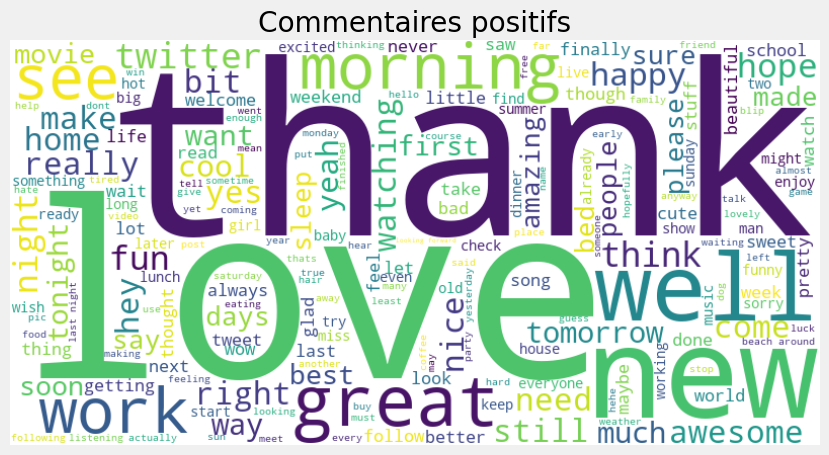

In [76]:
text_4 = ' '.join(df_pos['text_clean'])
wordcloud_4 = WordCloud(width=800, height=400, background_color='white').generate(text_4)
#map des mots clés prédominants
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.axis('off')
plt.title('Commentaires positifs')
plt.show()

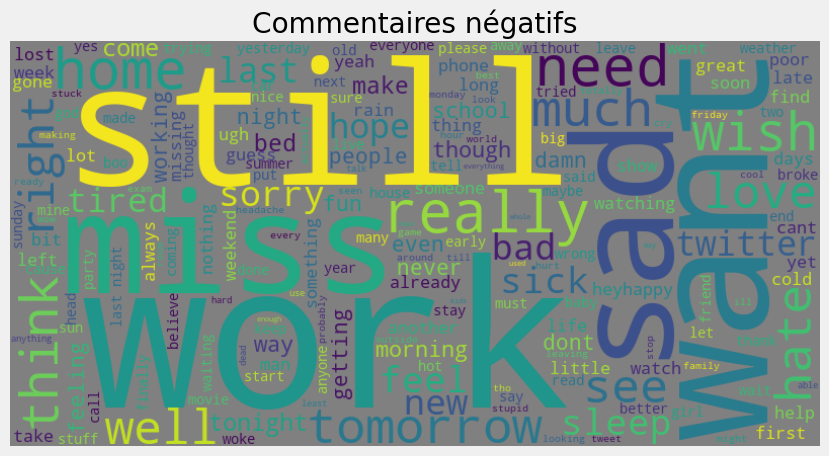

In [77]:
text_0 = ' '.join(df_neg['text_clean'])
wordcloud_0 = WordCloud(width=800, height=400, background_color='gray').generate(text_0)
#map des mots clés prédominants
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('Commentaires négatifs')
plt.show()

##### TF-IDF (Term Frequency-Inverse Document Frequency)
Par fréquence/poids de mots

In [78]:
#pip install scikit-learn

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
# Extraction des thèmes négatifss avec TF-IDF
tfidf_neg = TfidfVectorizer(max_features=1000)  
tfidf_matrix_neg = tfidf_neg.fit_transform(df_neg['text_clean'])
#
features_neg = tfidf_neg.get_feature_names_out()

In [81]:
# les termes les plus importants par commentaires
top_words_per_neg = []
for i in range(len(df_neg)):
    row = tfidf_matrix_neg[i].toarray().flatten()
    top_words_indices = row.argsort()[-10:]  
    top_words = [features_neg[j] for j in top_words_indices]
    top_words_per_neg.append(top_words)

In [82]:
print(top_words_per_neg[:10])

[['fit', 'five', 'fix', 'fixed', 'flash', 'flight', 'flu', 'finger', 'york', 'man'], ['fit', 'five', 'fix', 'fixed', 'flash', 'york', 'sorry', 'maybe', 'stuff', 'posted'], ['fix', 'fixed', 'flash', 'flight', 'flu', 'finish', 'york', 'high', 'sadness', 'total'], ['york', 'five', 'fit', 'fish', 'first', 'fire', 'fix', 'want', 'twitter', 'never'], ['fish', 'first', 'fit', 'york', 'work', 'bad', 'sleep', 'tonight', 'phone', 'cause'], ['fix', 'finish', 'flash', 'fixed', 'damn', 'flu', 'classes', 'virus', 'country', 'swine'], ['flight', 'finished', 'flash', 'fixed', 'much', 'love', 'lot', 'send', 'fire', 'catching'], ['york', 'fish', 'first', 'fire', 'finished', 'finish', 'fit', 'though', 'guess', 'since'], ['fix', 'fixed', 'flash', 'flight', 'flu', 'fly', 'follow', 'food', 'miss', 'lot'], ['fit', 'fish', 'first', 'fire', 'hate', 'sick', 'feeling', 'ugh', 'hey', 'hot']]


In [83]:
# Extraction des thèmes négatifss avec TF-IDF
tfidf_pos = TfidfVectorizer(max_features=1000)  
tfidf_matrix_pos = tfidf_pos.fit_transform(df_pos['text_clean'])
#
features_pos = tfidf_pos.get_feature_names_out()

In [84]:
# les termes les plus importants par commentaires
top_words_per_pos = []
for i in range(len(df_pos)):
    row = tfidf_matrix_neg[i].toarray().flatten()
    top_words_indices = row.argsort()[-10:]  
    top_words = [features_pos[j] for j in top_words_indices]
    top_words_per_pos.append(top_words)

In [85]:
print(top_words_per_pos[:10])

[['forgot', 'form', 'forward', 'found', 'free', 'french', 'friday', 'follow', 'zoo', 'missing'], ['forgot', 'form', 'forward', 'found', 'free', 'zoo', 'stand', 'money', 'sun', 'put'], ['forward', 'found', 'free', 'french', 'friday', 'follower', 'zoo', 'hubby', 'sea', 'tour'], ['zoo', 'form', 'forgot', 'forget', 'forever', 'food', 'forward', 'warm', 'two', 'paper'], ['forget', 'forever', 'forgot', 'zoo', 'working', 'background', 'someone', 'top', 'power', 'cat'], ['forward', 'follower', 'free', 'found', 'crossed', 'friday', 'chill', 'voice', 'complete', 'taste'], ['french', 'following', 'free', 'found', 'number', 'media', 'mean', 'shame', 'food', 'care'], ['zoo', 'forget', 'forever', 'food', 'following', 'follower', 'forgot', 'three', 'happy', 'site'], ['forward', 'found', 'free', 'french', 'friday', 'friend', 'fry', 'fully', 'near', 'mean'], ['forgot', 'forget', 'forever', 'food', 'hey', 'singing', 'felt', 'understand', 'house', 'imagine']]


In [86]:
#topic modeling

In [87]:
#corpus_pos = ' '.join(df_pos.text_clean)
#corpus_pos[:1000]

In [88]:
#pip install gensim

In [89]:
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

# Création d'un dictionnaire représentant le corpus
dictionary = corpora.Dictionary(top_words_per_pos)

# Transformation du corpus en sacs de mots (bag-of-words)
corpus_bow = [dictionary.doc2bow(doc) for doc in top_words_per_pos]

# Entraînement du modèle LDA
lda_model = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=5, passes=10)

# Affichage des sujets (topics)
pprint(lda_model.print_topics())

[(0,
  '0.109*"found" + 0.100*"free" + 0.097*"forward" + 0.091*"french" + '
  '0.083*"form" + 0.075*"friday" + 0.067*"follow" + 0.049*"zoo" + '
  '0.034*"friend" + 0.027*"forgot"'),
 (1,
  '0.087*"forever" + 0.082*"food" + 0.080*"forget" + 0.069*"forgot" + '
  '0.059*"zoo" + 0.059*"following" + 0.043*"form" + 0.023*"follower" + '
  '0.018*"forward" + 0.011*"working"'),
 (2,
  '0.027*"took" + 0.024*"less" + 0.022*"pay" + 0.019*"hungry" + '
  '0.019*"company" + 0.016*"sent" + 0.013*"final" + 0.013*"finally" + '
  '0.012*"film" + 0.012*"find"'),
 (3,
  '0.082*"forever" + 0.080*"forget" + 0.074*"food" + 0.067*"forgot" + '
  '0.050*"following" + 0.045*"zoo" + 0.038*"form" + 0.020*"follower" + '
  '0.017*"forward" + 0.008*"school"'),
 (4,
  '0.109*"free" + 0.109*"french" + 0.105*"found" + 0.104*"friday" + '
  '0.086*"friend" + 0.085*"forward" + 0.063*"zoo" + 0.060*"follower" + '
  '0.035*"fry" + 0.033*"form"')]


In [90]:
# dictionnaire représentant le corpus
dictionary = corpora.Dictionary(top_words_per_neg)

# bag-of-words
corpus_bow = [dictionary.doc2bow(doc) for doc in top_words_per_neg]

# train
lda_model = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=5, passes=10)

# sujets (topics)
pprint(lda_model.print_topics())

[(0,
  '0.024*"last" + 0.021*"feeling" + 0.014*"make" + 0.014*"felt" + '
  '0.014*"never" + 0.013*"home" + 0.012*"tomorrow" + 0.012*"festival" + '
  '0.012*"could" + 0.011*"love"'),
 (1,
  '0.099*"fit" + 0.065*"five" + 0.053*"fix" + 0.048*"fixed" + 0.031*"finger" + '
  '0.031*"fine" + 0.014*"even" + 0.013*"really" + 0.012*"still" + '
  '0.011*"sick"'),
 (2,
  '0.120*"flash" + 0.118*"flight" + 0.114*"fixed" + 0.108*"flu" + 0.096*"fix" '
  '+ 0.073*"fly" + 0.064*"york" + 0.054*"five" + 0.038*"finish" + '
  '0.031*"finger"'),
 (3,
  '0.031*"sleep" + 0.030*"morning" + 0.024*"need" + 0.022*"soon" + '
  '0.020*"night" + 0.020*"getting" + 0.019*"start" + 0.018*"well" + '
  '0.018*"tomorrow" + 0.017*"looking"'),
 (4,
  '0.107*"first" + 0.101*"fish" + 0.099*"fire" + 0.078*"fit" + 0.067*"york" + '
  '0.064*"finished" + 0.047*"five" + 0.027*"finish" + 0.020*"fix" + '
  '0.009*"work"')]


In [91]:
df.sample(5)

,sentiment,text_clean
9013,4,hung city tonight people really much great
743,4,officially done year even though make school n...
11498,0,feeling great work much
4298,4,yes days weekend yesterday monday meal
203,0,battery die


In [92]:
#word embedding

In [93]:
df.head()

,sentiment,text_clean
0,0,man valley
1,0,sorry maybe posted stuff
2,4,finished board
3,4,yeah saw
4,0,sadness high total


## 2. Implémentation des modeles

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset

/Users/dojo/anaconda3/envs/projet_7/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [95]:
# Préparation des données
df = df.dropna().reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['sentiment'], test_size=0.2, random_state=42)
# Transformation des étiquettes pour correspondre à 0 et 1
y_train = y_train.replace({4: 1, 0: 0})
y_test = y_test.replace({4: 1, 0: 0})

In [96]:
#y_train = np.array(y_train)
#y_test = np.array(y_test)
#y_train

### 2.1. Modèle classique : SVM

In [97]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modèle SVM 
svm_model = SVC()
svm_model.fit(X_train_vec, y_train)
svm_predictions = svm_model.predict(X_test_vec)


In [98]:
# Afficher les performances du modèle classique
print("Performances du modèle classique (Support Vector Machine):")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions))
print("Recall:", recall_score(y_test, svm_predictions))
print("F1 Score:", f1_score(y_test, svm_predictions))

Performances du modèle classique (Support Vector Machine):
Accuracy: 0.7099029126213592
Precision: 0.7172470978441128
Recall: 0.6805664830841857
F1 Score: 0.6984255147355671


In [99]:
#import os
#current_directory = os.getcwd()
#print(current_directory)

In [100]:
#pip install mlflow

### 2.2. Réseaux de neurones

In [101]:
#pip install tensorflow

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [103]:
# Tokenisation des textes
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# padding
maxlen = 25  # 
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')


In [104]:
X_train_pad

array([[116, 751,   0, ...,   0,   0,   0],
       [ 15,  69,  33, ...,   0,   0,   0],
       [241,   0,   0, ...,   0,   0,   0],
       ...,
       [160,   0,   0, ...,   0,   0,   0],
       [469, 333,  32, ...,   0,   0,   0],
       [253, 135,   0, ...,   0,   0,   0]], dtype=int32)

In [105]:
#y_train

In [106]:
vocab_size = len(tokenizer.word_index) + 1  # Taille du vocabulaire

model = Sequential()
#couche d'entiers : entrée
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=maxlen))
#layeur
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
# Couche de sortie binaire
model.add(Dense(1, activation='sigmoid'))  
#descente de grandiant : loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()  # structure


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           157300    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 274677 (1.05 MB)
Trainable params: 274677 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
#

In [108]:
model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
322/322 [==============================] - 12s 33ms/step - loss: 0.6265 - accuracy: 0.6310 - val_loss: 0.5915 - val_accuracy: 0.7037
Epoch 2/10
322/322 [==============================] - 11s 33ms/step - loss: 0.5243 - accuracy: 0.7515 - val_loss: 0.5837 - val_accuracy: 0.7107
Epoch 3/10
322/322 [==============================] - 11s 33ms/step - loss: 0.5012 - accuracy: 0.7678 - val_loss: 0.6146 - val_accuracy: 0.7049
Epoch 4/10
322/322 [==============================] - 11s 33ms/step - loss: 0.4885 - accuracy: 0.7762 - val_loss: 0.5927 - val_accuracy: 0.7037
Epoch 5/10
322/322 [==============================] - 10s 32ms/step - loss: 0.4722 - accuracy: 0.7828 - val_loss: 0.6022 - val_accuracy: 0.7041
Epoch 6/10
322/322 [==============================] - 11s 33ms/step - loss: 0.4545 - accuracy: 0.7915 - val_loss: 0.6233 - val_accuracy: 0.6979
Epoch 7/10
322/322 [==============================] - 11s 33ms/step - loss: 0.4380 - accuracy: 0.7942 - val_loss: 0.6625 - val_accuracy:

In [109]:
# Prédictions sur les données de test
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

print("Performances du modèle RNN LSTM:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


81/81 [==============================] - 1s 5ms/step
Performances du modèle RNN LSTM:
Accuracy: 0.673009708737864
Precision: 0.6368857689853222
Recall: 0.7852084972462627
F1 Score: 0.7033121916842846


### 2.3. Modèle BERT

In [110]:
#pip install transformers
#pip install torch torchvision torchaudio

In [111]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset

print(torch.__version__)

2.1.2


In [112]:
# Chargement du tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encodage des données textuelles avec BERT tokenizer
encoded_inputs_train = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt')
encoded_inputs_test = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt')

# Création des tenseurs de données pour PyTorch DataLoader
train_dataset = TensorDataset(encoded_inputs_train['input_ids'], encoded_inputs_train['attention_mask'], torch.tensor(y_train.values))
test_dataset = TensorDataset(encoded_inputs_test['input_ids'], encoded_inputs_test['attention_mask'], torch.tensor(y_test.values))

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4)


In [113]:
# Charger le modèle BERT pour classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Définir l'optimizer et le scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Entraînement du modèle sur 3 époques
model.train()
for epoch in range(3):
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [115]:
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import DataLoader

#
#model.train()

for epoch in range(3):
    running_loss = 0.0
    predictions = []
    true_labels = []

    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Collecter les prédictions et les étiquettes réelles pour le calcul de la précision
        predictions.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

        val_predictions.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        val_true_labels.extend(labels.cpu().numpy())

        running_loss += loss.item()

    # Calculer la précision pour chaque époque
    epoch_loss = running_loss / len(train_dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    val_accuracy = accuracy_score(val_true_labels, val_predictions)

    print(f'Epoch {epoch + 1}/{3} - Loss: {epoch_loss:.4f} - Accuracy: {accuracy:.4f}')


Epoch 1/3 - Loss: 0.2190 - Accuracy: 0.9101
Epoch 2/3 - Loss: 0.1619 - Accuracy: 0.9359
Epoch 3/3 - Loss: 0.1321 - Accuracy: 0.9443


L'accuracy du modele BERT est phénoménale

In [ ]:
# Calculer la val_accuracy
val_predictions = []
val_true_labels = []
for batch in val_dataloader:
    input_ids, attention_mask, labels = batch
    outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
    val_predictions.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
    val_true_labels.extend(labels.cpu().numpy())
val_accuracy = accuracy_score(val_true_labels, val_predictions)

# Afficher les résultats
print(f'Epoch {epoch + 1}/{3} - Loss: {epoch_loss:.4f} - Accuracy: {accuracy:.4f} - Val_accuracy: {val_accuracy:.4f}')
